In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/ortho_knnnb.csv')

In [ ]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [ ]:
data.shape

(310, 7)

In [ ]:
data.head()

#We are trying to predict the Normality and abnormality chances of Human Body

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


#Exploratory Data Analysis

In [ ]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


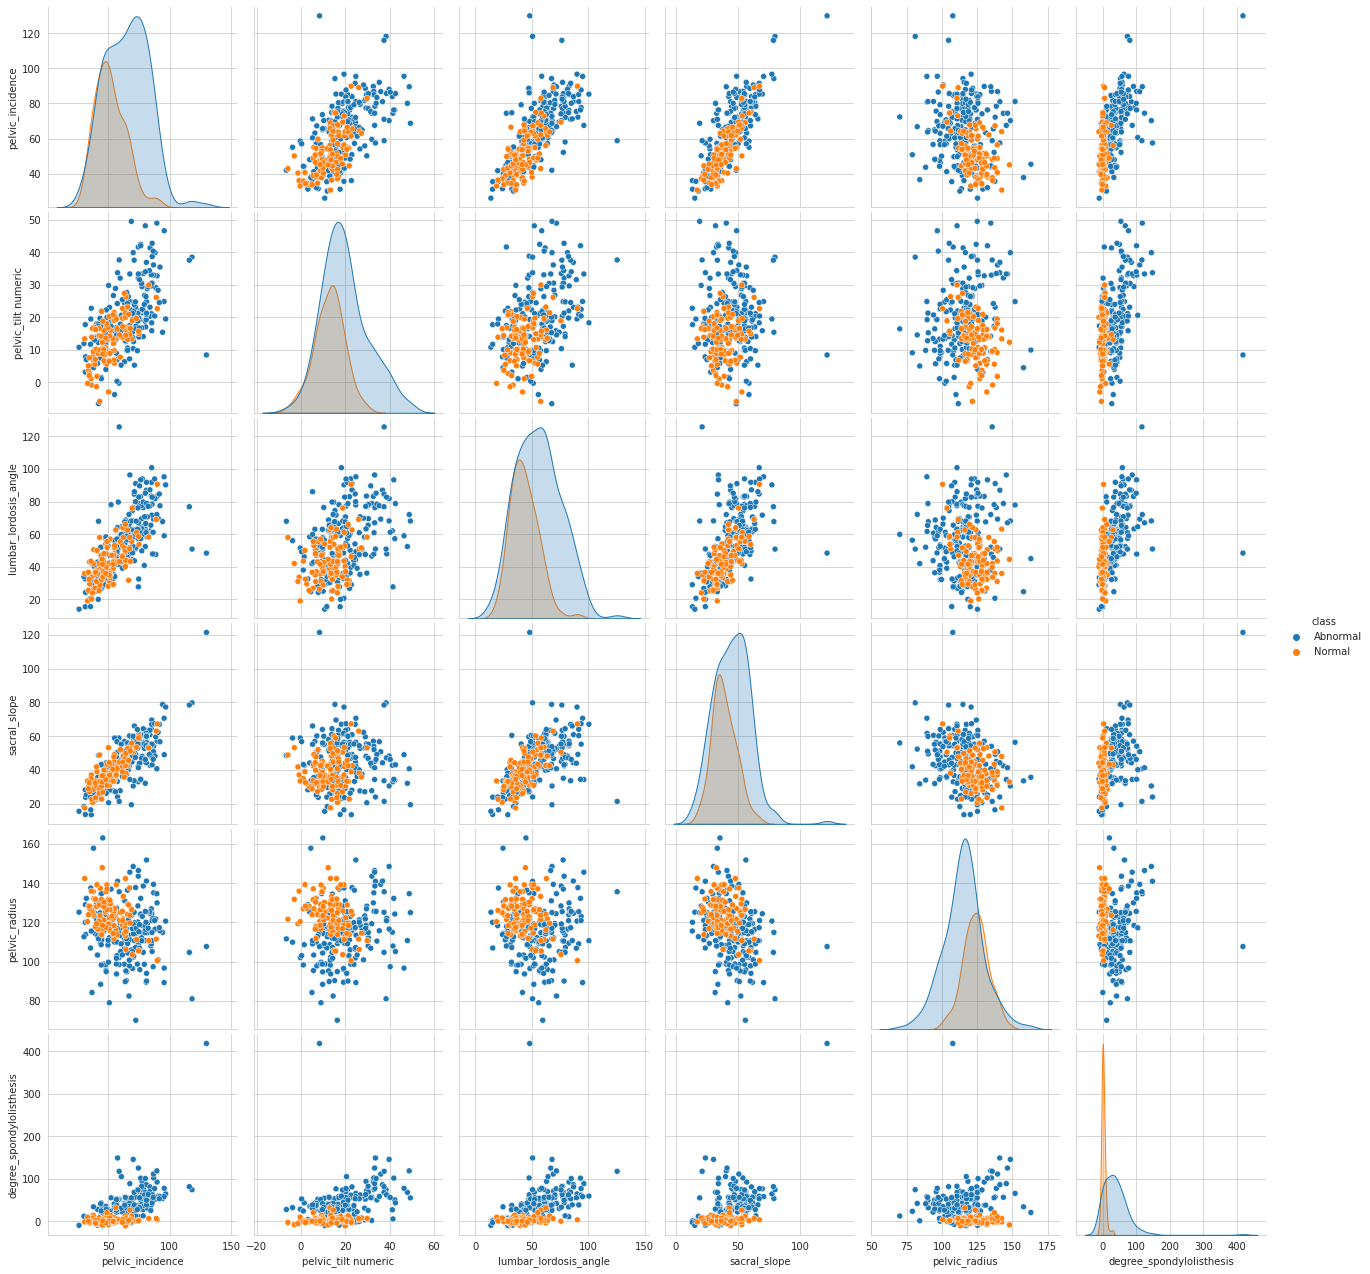

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data, hue='class',size = 3)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been rena

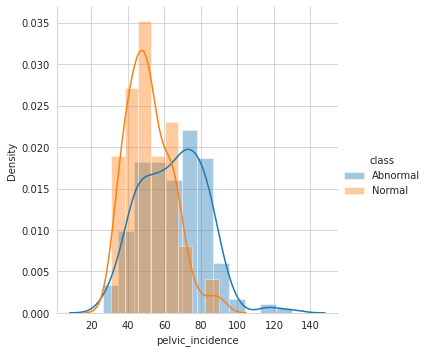

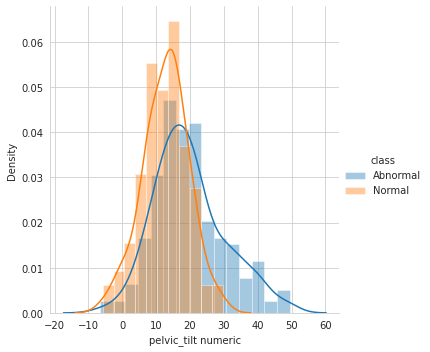

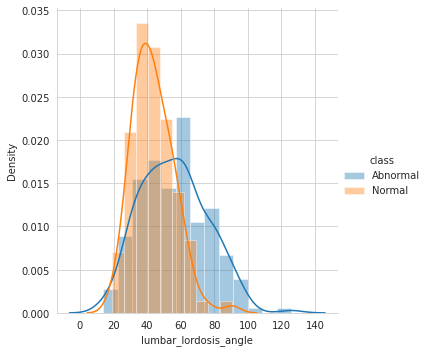

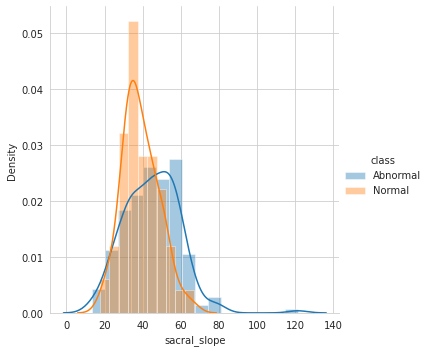

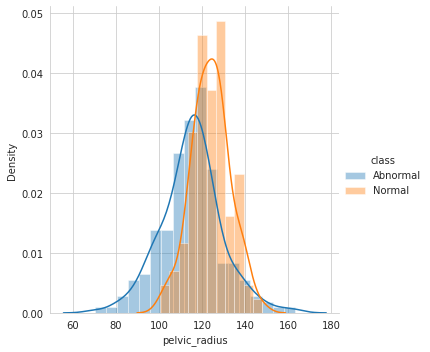

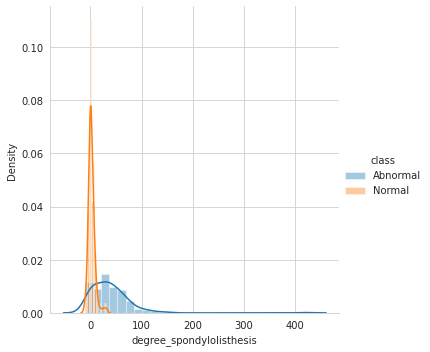

In [ ]:
for name in data.columns.values[:-1]:
    sns.FacetGrid(data, hue="class", size=5).map(sns.distplot, name).add_legend()
plt.show()

#Data Encoding

In [ ]:
df = data.copy()

In [ ]:
from sklearn import preprocessing
 
le = preprocessing.LabelEncoder()
 
df['symptom_class']= le.fit_transform(df['class'])

df = df.drop(['class'],axis = 1)

In [ ]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


#spliting dataset

In [ ]:
x = df.drop(['symptom_class'],axis = 1)

In [ ]:
y = df['symptom_class']

In [ ]:
x.head()



,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: symptom_class, dtype: int64

#Normalizing Data

In [ ]:
from sklearn import preprocessing
names = x.columns
d = preprocessing.normalize(x,axis = 0)
norm = pd.DataFrame(d, columns = names)
norm.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.056915,0.063446,0.040802,0.051090,0.047226,-0.000315
1,0.035269,0.028304,0.025769,0.036600,0.054756,0.005660
2,0.062156,0.062506,0.051601,0.058838,0.050726,-0.004378
3,0.062576,0.069354,0.045646,0.056352,0.048756,0.013903
4,0.044891,0.027154,0.029170,0.050567,0.051771,0.009820


#Train Test 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(norm,y,test_size=0.20)


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = KNN.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(pred,y_test)

0.9354838709677419

In [ ]:
train_acc = []
test_acc = []

for k in range(1,16):
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)

  train_p = KNN.predict(x_train)
  train_score = accuracy_score(train_p, y_train)
  train_acc.append(train_score)

  test_p = KNN.predict(x_test)
  test_score = accuracy_score(test_p,y_test)
  test_acc.append(test_score)

print("{} is train accuracy. {} is Test Accuracy.".format(max(train_acc),1+test_acc.index(max(test_acc))))

1.0 is train accuracy. 8 is Test Accuracy.


#Trying with increased K value


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
pred = KNN.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(pred,y_test)

0.9516129032258065

In [ ]:
train_acc = []
test_acc = []

for k in range(1,16):
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)

  train_p = KNN.predict(x_train)
  train_score = accuracy_score(train_p, y_train)
  train_acc.append(train_score)

  test_p = KNN.predict(x_test)
  test_score = accuracy_score(test_p,y_test)
  test_acc.append(test_score)

print("{} is train accuracy. {} is Test Accuracy.".format(max(train_acc),1+test_acc.index(max(test_acc))))

1.0 is train accuracy. 8 is Test Accuracy.


In [ ]:
from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors": list(range(1,16,1)), 'metric': ['euclidean','manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]})

In [ ]:
knn_besthypr = grid_knn.best_estimator_
knn_besthypr

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [ ]:
print("Tuned hyperparameter: {}".format(grid_knn.best_params_)) 
print("Best score: {}".format(grid_knn.best_score_))

Tuned hyperparameter: {'metric': 'manhattan', 'n_neighbors': 10}
Best score: 0.8145306122448981


In [ ]:
knn = knn_besthypr.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc = accuracy_score(y_pred,y_test)
print('The accuracy of the KNN with K = {} is {}%'.format(knn_besthypr.n_neighbors,round(acc*100,2)))

The accuracy of the KNN with K = 10 is 93.55%


#Naive B Classifier

In [ ]:
#train, test = train_test_split(df,test_size = 0.20,random_state=1)

In [ ]:
# x_train = train.drop(['symptom_class'],axis = 1)
# y_train = train['symptom_class']

# x_test= test.drop(['symptom_class'],axis= 1)
# y_test = test['symptom_class']

In [ ]:
from sklearn.naive_bayes import GaussianNB

nvclass = GaussianNB()
nvclass.fit(x_train, y_train)
y_pred = nvclass.predict(x_test)
print(y_pred)

[0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0]


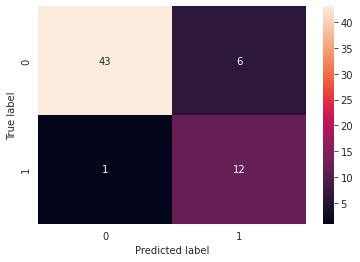

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()